# COMP5101 Assignment 3
### Bahadır Özkan

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

train = pd.read_csv("train.csv")

In [2]:
#read the test data
test = pd.read_csv("test.csv")
test = pd.get_dummies(test, drop_first=False)

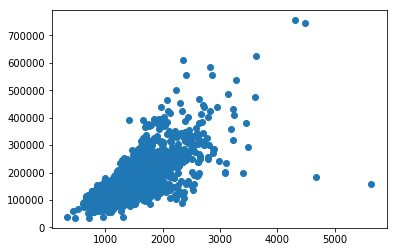

In [3]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

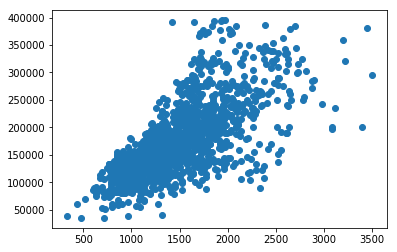

In [4]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train3 = train2.drop(["SalePrice"],axis=1)
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"])

In [5]:
X = pd.get_dummies(train2, drop_first=False)
#To get the same shape[1] for train and test data
X,test2 = X.align(test, join='inner', axis=1, fill_value=0)

In [6]:
X = X.loc[:,:]
y = train2.loc[:,'SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1287, 271) (1287,)
(143, 271) (143,)


In [7]:
#To check if it has the same shape[1] as train data
test2.shape

(1459, 271)

In [23]:
# Scores according to different metrics
mean_sales_price = y_train.mean()
mean_array = np.ones(y_test.size)*mean_sales_price
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(np.abs(y_pred))))
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [214]:
mae, kaggle, mape = [], [], []
min_s = [2,]
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())
    
    model = DecisionTreeRegressor(random_state=None, criterion="friedman_mse",min_samples_split=10, max_depth=10, max_features="auto")
    model = model.fit(X_train, y_train)
    models.append(model)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))
    
print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))

Test MAE: 20562.795024
Test Kaggle-Score: 0.167461209523
Test MAPE: 12.5855264601


In [204]:
#Check first 10 train predictions
test_predictions[:10]

array([ 227522.46666667,   96934.88571429,  162937.5       ,
        146180.        ,  138725.        ,  171556.88888889,
        129225.        ,   96934.88571429,  139914.61538462,
        145666.66666667])

In [176]:
#Fill NaN data with 0
test2.fillna(0,inplace=True)

In [218]:
#Prediction for test data
test_predictions = model.predict(test2)

In [219]:
#Check first 10 test predictions
test_predictions[:10]

array([ 125675.86206897,  164100.        ,  178550.        ,
        163050.        ,  173150.        ,  179495.71111111,
        163857.14285714,  179495.71111111,  190403.67105263,
        118431.93333333])

In [220]:
#create a submission file
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': test_predictions})
my_submission.to_csv('submission.csv', index=False)